# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [20]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

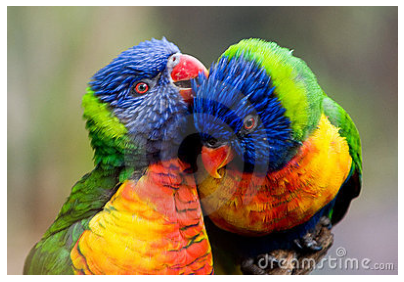

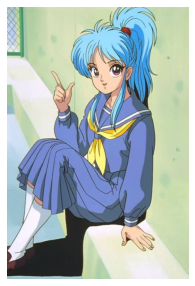

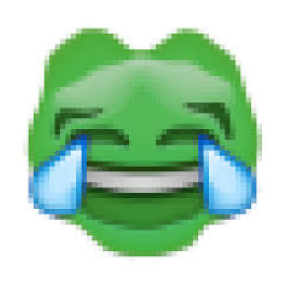

In [25]:
img = cv2.imread('birds.jpg') # считать картинку
img_pre = img
anime = cv2.imread('anime.jpg')
meme = cv2.imread('meme.jpg')
draw_picture(img) # нарисовать картинку
draw_picture(anime)
draw_picture(meme)

In [26]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей
print(anime.shape)
print(meme.shape)

(275, 400, 3)
(750, 500, 3)
(225, 225, 3)


In [27]:
img = img.reshape((-1, 3))
anime = anime.reshape((-1, 3))
meme = meme.reshape((-1, 3))

In [28]:
img.shape

(110000, 3)

In [37]:
from sklearn.cluster import KMeans
def k_means_image(image, k=2, resol_x=275, resoly_y=400):
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(image)
    nw_image = np.array([[int(model.cluster_centers_[elem][0]), int(model.cluster_centers_[elem][1]), int(model.cluster_centers_[elem][2])] for elem in y_pred])
    display(ssim(image, nw_image, multichannel=True))   
    nw_image = nw_image.reshape((resol_x, resoly_y, 3))
    draw_picture(nw_image)

0.4505075536314616

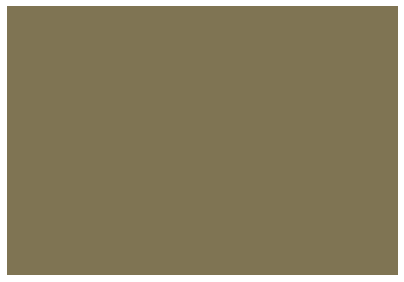

0.5458544961012773

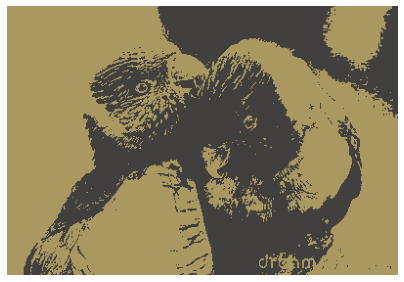

0.5640983646190346

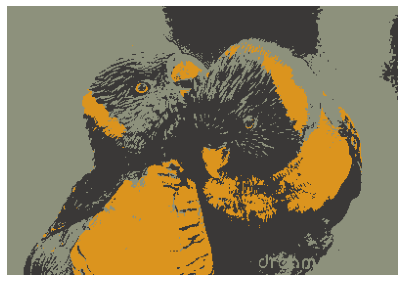

0.6622620668210147

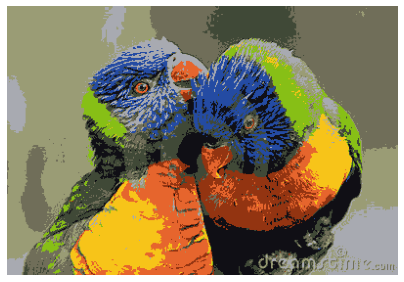

0.7316779229121383

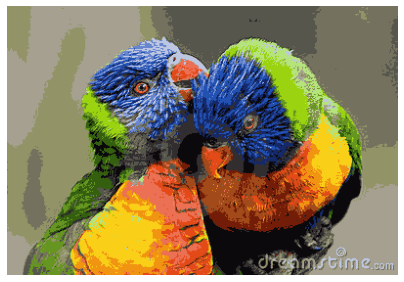

In [38]:
k_means_image(img, k=1)
k_means_image(img, k=2)
k_means_image(img, k=3)
k_means_image(img, k=10)
k_means_image(img, k=20)

0.6219084639086186

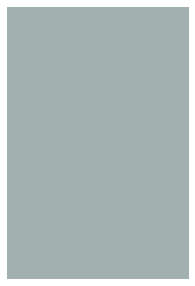

0.73907357209419

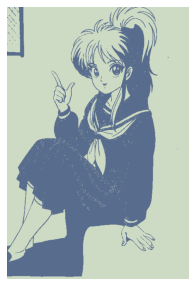

0.8102859151297624

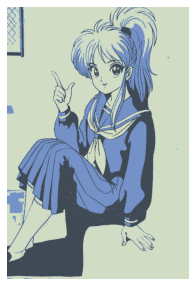

0.8850756221883888

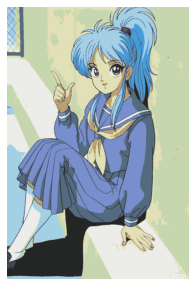

0.9066428270390964

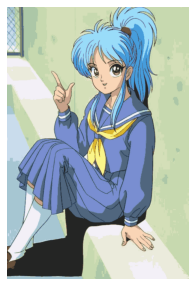

In [39]:
k_means_image(anime, k=1, resol_x=750, resoly_y=500)
k_means_image(anime, k=2, resol_x=750, resoly_y=500)
k_means_image(anime, k=3, resol_x=750, resoly_y=500)
k_means_image(anime, k=10, resol_x=750, resoly_y=500)
k_means_image(anime, k=20, resol_x=750, resoly_y=500)


In [42]:
from sklearn.cluster import DBSCAN
import collections

def DBSCAN_image(image, eps=1.75, min_samples=1):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = model.fit_predict(image)
    meansR = collections.Counter()
    meansG = collections.Counter()
    meansB = collections.Counter()
    cnt = collections.Counter()
    for index, elem in enumerate(y_pred):
        cnt[elem] += 1
        meansR[elem] += img[index][0]
        meansG[elem] += img[index][1]
        meansB[elem] += img[index][2]

    for elem in y_pred:
        meansR[elem] //= cnt[elem]
        meansG[elem] //= cnt[elem]
        meansB[elem] //= cnt[elem]

    nw_image = np.array([[meansR[elem], meansG[elem], meansB[elem]] for elem in y_pred])
    display(ssim(image, nw_image, multichannel=True))
    nw_image = nw_image.reshape((275, 400, 3))
    draw_picture(nw_image)

0.4663931601848483

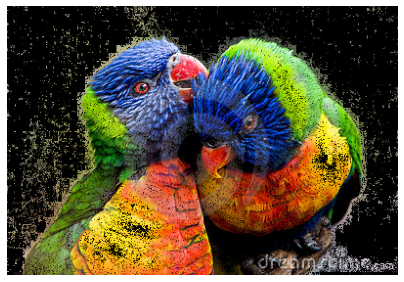

0.4663931601848483

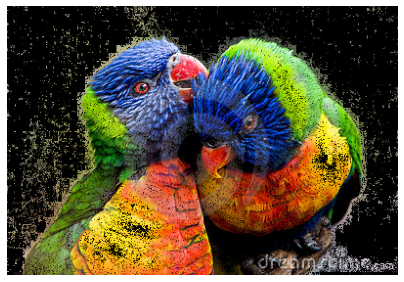

0.39710187269410246

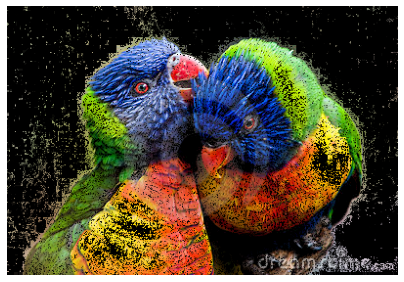

0.233420606887365

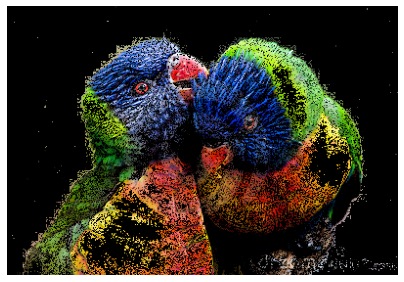

0.12276447398256134

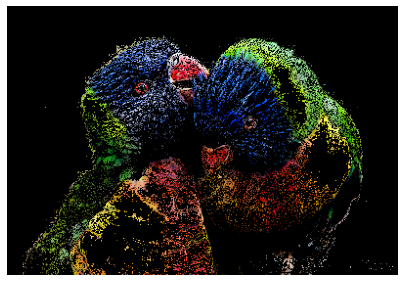

0.0736268101552234

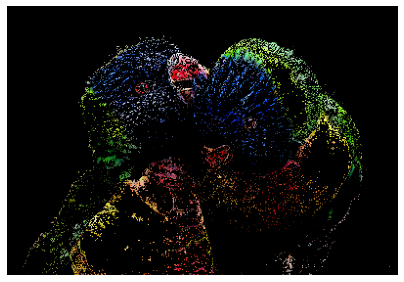

0.04730092814475895

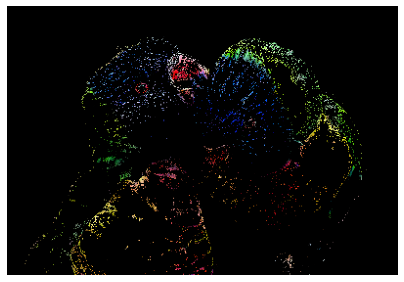

In [43]:
DBSCAN_image(img, eps=0.1)
DBSCAN_image(img, eps=0.5)
DBSCAN_image(img, eps=1)
DBSCAN_image(img, eps=2)
DBSCAN_image(img, eps=3)
DBSCAN_image(img, eps=4)
DBSCAN_image(img, eps=5)

0.03866865458430841

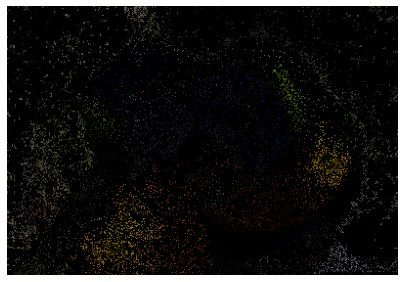

0.03866865458430841

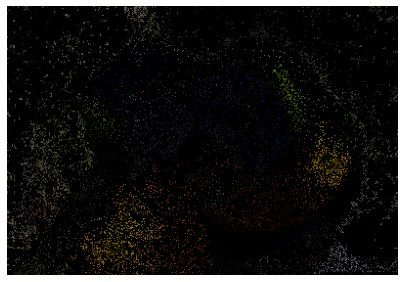

0.04095243421814951

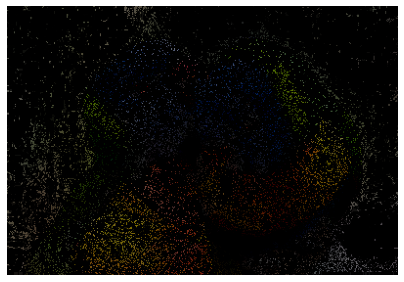

0.04443276178838962

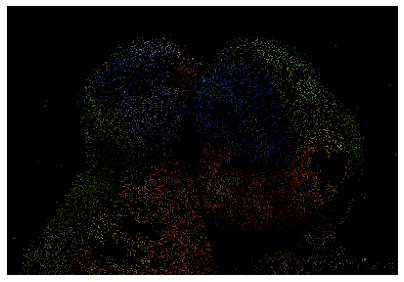

0.03921854387000616

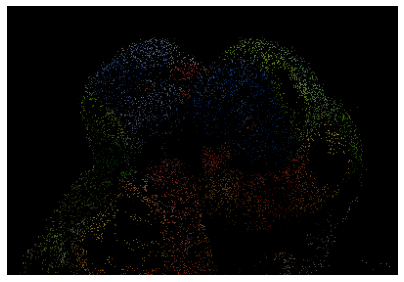

0.031142895319598046

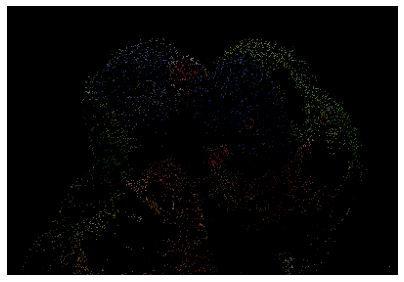

0.026291870851173873

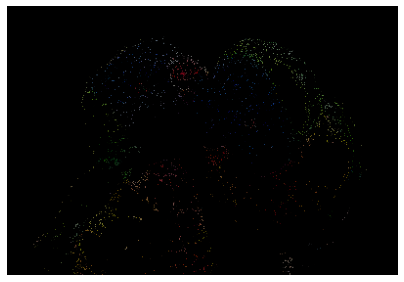

In [44]:
DBSCAN_image(img, eps=0.1, min_samples=2)
DBSCAN_image(img, eps=0.5, min_samples=2)
DBSCAN_image(img, eps=1, min_samples=2)
DBSCAN_image(img, eps=2, min_samples=2)
DBSCAN_image(img, eps=3, min_samples=2)
DBSCAN_image(img, eps=4, min_samples=2)
DBSCAN_image(img, eps=5, min_samples=2)

** Замечаем, что DBSCAN работает более менее только с min_samples = 1, так как в противном случае слишком много выбросов (черный цвет)**

array([[116, 150, 140],
       [115, 149, 139],
       [113, 147, 137],
       ...,
       [160, 145, 159],
       [159, 144, 158],
       [159, 144, 158]], dtype=uint8)

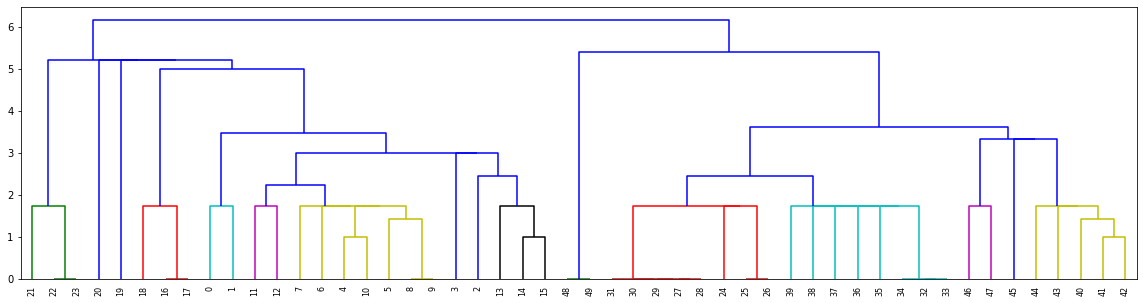

In [55]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

display(img)
distance_mat = pdist(img[:50]) # pdist считает попарные расстояние расстояния

Z = hierarchy.linkage(distance_mat, 'single') # linkage — как считать расстояние между кластерами
plt.figure(figsize=(20, 5))
dn = hierarchy.dendrogram(Z, color_threshold=2.0) 

In [60]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, linkage='single')
y_pred = model.fit_predict(img)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import collections

def aglomerative_image(image, n_clusters=2, linkage='complete', resol_x=250, resol_y=400):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    y_pred = model.fit_predict(image)
    meansR = collections.Counter()
    meansG = collections.Counter()
    meansB = collections.Counter()
    cnt = collections.Counter()
    for index, elem in enumerate(y_pred):
        cnt[elem] += 1
        meansR[elem] += img[index][0]
        meansG[elem] += img[index][1]
        meansB[elem] += img[index][2]

    for elem in y_pred:
        meansR[elem] //= cnt[elem]
        meansG[elem] //= cnt[elem]
        meansB[elem] //= cnt[elem]

    nw_image = np.array([[meansR[elem], meansG[elem], meansB[elem]] for elem in y_pred])
    nw_image = nw_image.reshape((resol_x, resol_y, 3))
    draw_picture(nw_image)


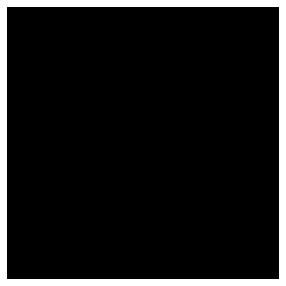

In [18]:
aglomerative_image(meme, n_clusters=5, resol_x=225, resol_y=225)
#Очень долго считается почему-то..

** И не работает ((((( **

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [9]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [10]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [12]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [13]:
y.shape

(2370,)

In [17]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

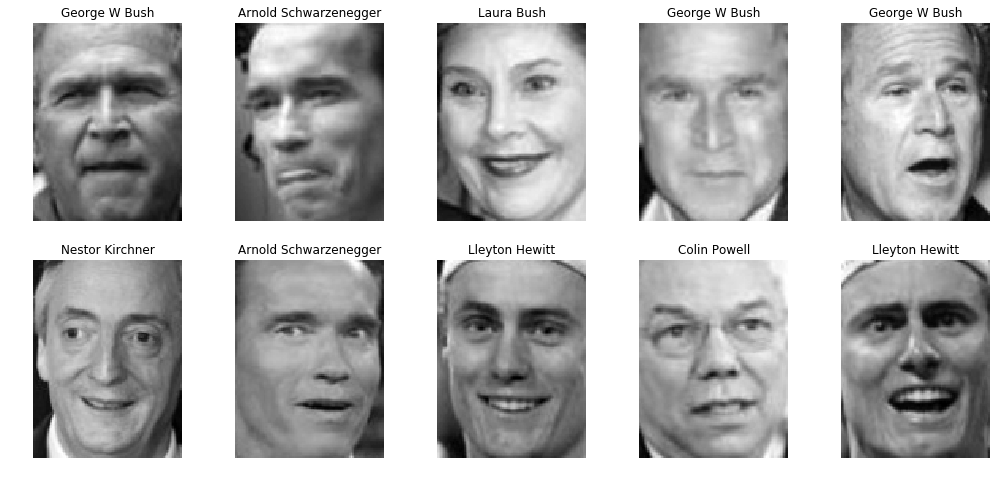

In [15]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц